In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from fancyimpute import KNN
from sklearn.model_selection import train_test_split #used to split dataset into train and test
from sklearn.metrics import mean_squared_error # used to calculate MSE
from sklearn.metrics import r2_score # used to calculate r square
from sklearn.linear_model import LinearRegression # For linear regression
from sklearn.tree import DecisionTreeRegressor # For Decision Tree
from sklearn.ensemble import RandomForestRegressor # For RandomForest
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
train = pd.read_csv("https://raw.githubusercontent.com/iamyumang/hello-world/master/EDtrain_cab.csv")
test = pd.read_csv("https://raw.githubusercontent.com/iamyumang/hello-world/master/EDtest.csv")

In [3]:
train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
train.shape

(16067, 7)

In [5]:
train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

# Handling Missing Values and Outliers

In [6]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val



,index,0
0,fare_amount,24
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [7]:
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val

missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100   #Percentage

missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True) #descending order
missing_val

,Variables,Missing_percentage
0,passenger_count,0.342317
1,fare_amount,0.149374
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [8]:
train["passenger_count"].isnull().sum()/len(train["passenger_count"])*100 

0.34231654944918155

**passenger_count has 0.342% of missing values**

In [9]:
train["passenger_count"].value_counts() 

1.00       11259
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [10]:
train["passenger_count"].isnull().sum()

55

**Date Time Analysis**

In [0]:
#Handling Date-Time
train["pickup_datetime"] = pd.to_datetime(train['pickup_datetime'], errors='coerce')
train = train.dropna(subset=['pickup_datetime'])

#Now we'll split the pickup_date time variable into year, month, date. 

train['year'] =train['pickup_datetime'].dt.year
train['month'] = train['pickup_datetime'].dt.month
train['pickup_date'] = train['pickup_datetime'].dt.day
train['pickup_hour'] = train['pickup_datetime'].dt.hour

#Now Deleting "pickup_datetime"] column
del train["pickup_datetime"]

In [12]:
train["year"].describe()

count    16066.000000
mean      2011.730860
std          1.864275
min       2009.000000
25%       2010.000000
50%       2012.000000
75%       2013.000000
max       2015.000000
Name: year, dtype: float64

In [13]:
train = train.drop(train[train['passenger_count']<1].index, axis=0) # drop the variable which have passenger_count < 1
train.reset_index(drop=True, inplace=True)
train.shape

(16008, 10)

***In general we know that a cab contains not more than 6 passengers at a time but we can clearly see in the data that there are some cabs which hold the passengers in double, triple and even four digits in numbers so they should be treated as outliers hence we will remove them***

In [14]:
train = train.drop(train[train['passenger_count']> 6].index, axis=0)
train = train.drop(train[train['passenger_count'] == 1.3].index, axis=0) # passenger_count should not be in fractional form
train["passenger_count"].isnull().sum()

55

In [15]:
train["passenger_count"].unique()

array([ 1.,  2.,  3., nan,  6.,  5.,  4.])

In [16]:
train["passenger_count"].loc[9000]

1.0

In [17]:
train["passenger_count"].loc[9000] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
train["passenger_count"].loc[9000]

nan

In [19]:
train.mode()['passenger_count'][0]

1.0

In [20]:
pd.to_numeric(train["passenger_count"])

0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        2.0
10       1.0
11       3.0
12       2.0
13       1.0
14       2.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       3.0
26       1.0
27       3.0
28       1.0
29       2.0
        ... 
15978    1.0
15979    1.0
15980    5.0
15981    1.0
15982    1.0
15983    2.0
15984    2.0
15985    1.0
15986    2.0
15987    1.0
15988    1.0
15989    1.0
15990    4.0
15991    1.0
15992    2.0
15993    5.0
15994    1.0
15995    1.0
15996    1.0
15997    1.0
15998    6.0
15999    2.0
16000    3.0
16001    1.0
16002    1.0
16003    1.0
16004    2.0
16005    1.0
16006    1.0
16007    NaN
Name: passenger_count, Length: 15987, dtype: float64

In [0]:
train["passenger_count"].fillna(train.mode()['passenger_count'][0], inplace= True)

In [22]:
train["passenger_count"].unique()

array([1., 2., 3., 6., 5., 4.])

***fare_amount has 0.149% of missing values ***

In [23]:
train.isnull().sum()

fare_amount          23
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
year                  0
month                 0
pickup_date           0
pickup_hour           0
dtype: int64

In [24]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,pickup_date,pickup_hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,7


In [25]:
train["fare_amount"].describe()

count     15964
unique      468
top         6.5
freq        755
Name: fare_amount, dtype: object

In [0]:
train = train.drop(train[train['fare_amount'] == "430-"].index, axis=0)

In [27]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,pickup_date,pickup_hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,7


In [0]:
train["fare_amount"] = train["fare_amount"].astype(float)

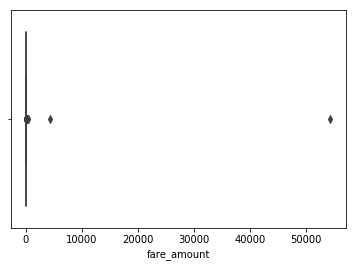

In [29]:
plt.figure(figsize=(20,5))
%matplotlib inline


sns.boxplot(x=train['fare_amount'],data=train,orient='h')

In [0]:
Q1 =  train['fare_amount'].quantile(0.25)
Q3 = train['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

In [31]:
(train[(train['fare_amount'] < Q1-1.5*IQR ) | (train['fare_amount'] > Q3+1.5*IQR)]['fare_amount']).shape

(1394,)

In [0]:
maximum = Q3+1.5*IQR
minimum = Q1-1.5*IQR

In [33]:
train["fare_amount"].describe()

count    15963.000000
mean        15.044403
std        431.524487
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [0]:
train.loc[train["fare_amount"] < minimum,: 'fare_amount'] = np.nan
train.loc[train["fare_amount"] > maximum,: 'fare_amount'] = np.nan

In [35]:
train.isnull().sum()

fare_amount          1417
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
month                   0
pickup_date             0
pickup_hour             0
dtype: int64

In [36]:
train["fare_amount"].head(10)

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
5    12.1
6     7.5
7    16.5
8     NaN
9     8.9
Name: fare_amount, dtype: float64

In [0]:
train = train.drop(train[train['fare_amount']<=0].index, axis=0) 
# drop variable which have 0 fare_amount

In [38]:
train["fare_amount"].describe()

count    14565.000000
mean         8.904179
std          4.137421
min          0.010000
25%          5.700000
50%          8.000000
75%         11.000000
max         22.100000
Name: fare_amount, dtype: float64

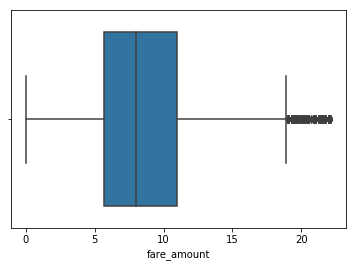

In [39]:
plt.figure(figsize=(20,5))
%matplotlib inline


sns.boxplot(x=train['fare_amount'],data=train,orient='h')

In [40]:
train.isnull().sum()

fare_amount          1417
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
month                   0
pickup_date             0
pickup_hour             0
dtype: int64

In [41]:
train["fare_amount"].iloc[7000]

7.7

***Actual value in fare_amount at 7000 location = 7.7*** ***(Randomly selected)***

In [0]:
#Actual value = 7.7
#Median = 8
#Mean = 8.47
#KNN = 10.537

In [43]:
train["fare_amount"].iloc[7000]= np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
train["fare_amount"].iloc[7000]

nan

In [0]:
train["fare_amount"].fillna(train["fare_amount"].median(), inplace= True)

In [0]:
#train = pd.DataFrame(KNN(k=3).fit_transform(train), columns = train.columns)

In [0]:
# a6_dims = (14, 14)
# fig, axes = plt.subplots(nrows=3,ncols=2,figsize=a6_dims)
# sns.set(color_codes=True)
# sns.set(style="white", palette="muted")
# sns.distplot(train['fare_amount'], ax=axes[0][0])

In [48]:
train["fare_amount"].iloc[7000]

8.0

In [49]:
train["fare_amount"].describe()

count    15982.000000
mean         8.824031
std          3.958085
min          0.010000
25%          6.000000
50%          8.000000
75%         10.500000
max         22.100000
Name: fare_amount, dtype: float64

In [50]:
train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
pickup_date          0
pickup_hour          0
dtype: int64

In [51]:
train.loc[train['pickup_latitude'] > 90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,pickup_date,pickup_hour
5663,3.3,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,11


In [52]:
train.shape

(15982, 10)

***Remove all the variables which are beyond the range***
***latitude ranges from -90 to +90
*** ***longitude ranges from -180 to +180***

In [53]:
train['pickup_latitude'].describe()

count    15982.000000
mean        39.920507
std          6.815267
min        -74.006893
25%         40.734946
50%         40.752636
75%         40.767401
max        401.083332
Name: pickup_latitude, dtype: float64

In [54]:
train = train.drop(train[train['dropoff_latitude']> 90].index, axis=0) 
train = train.drop(train[train['pickup_latitude']< -90].index, axis=0) 
train = train.drop(train[train['dropoff_latitude']< -90].index, axis=0) 
train = train.drop(train[train['pickup_latitude']> 90].index, axis=0) 
train.shape

(15981, 10)

In [55]:
train = train.drop(train[train['pickup_longitude']> 180].index, axis=0) 
train = train.drop(train[train['pickup_longitude']< -180].index, axis=0) 
train = train.drop(train[train['dropoff_longitude']> 180].index, axis=0) 
train = train.drop(train[train['dropoff_longitude']< -180].index, axis=0) 
train.shape

(15981, 10)

In [56]:
train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
pickup_date          0
pickup_hour          0
dtype: int64

In [0]:
train.reset_index(drop=True, inplace=True)

In [58]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,pickup_date,pickup_hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,7


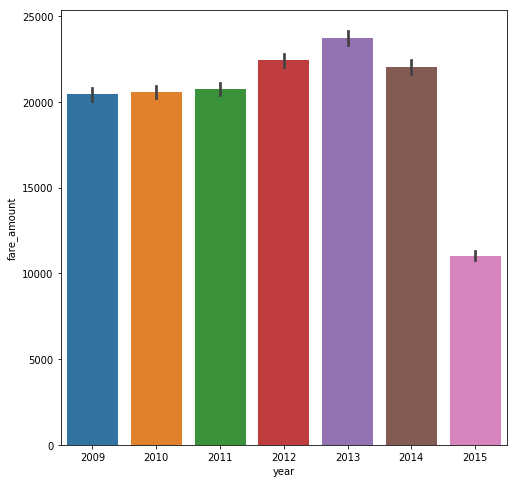

In [59]:
# Now we'll plot the bar graph between categorical variable and target variable to see the relations.


plt.figure(figsize= (8,8))
ax_1 = sns.barplot(x="year", y="fare_amount", data=train, estimator=sum)

In [0]:
# In the above bar graph, we clearly see that in year 2015, amount_fare is less. In 2009,2010,2011 amount_fare is moderate. In 2012, 2013,2014 amount_fare is high.


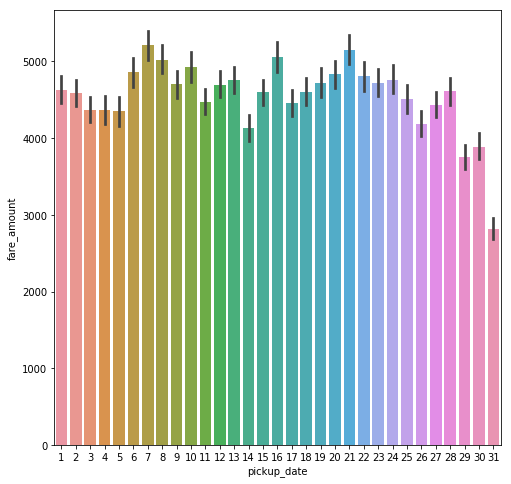

In [60]:
plt.figure(figsize= (8,8))
ax_2 =  sns.barplot(x="pickup_date", y="fare_amount", data=train, estimator=sum)

In [0]:
# In the above bar graph, we clearly see that in last 3 days, fare_ is less. In starting 5 days amount_fare is moderate and rest of the days amount_fare is high as compared to other days.

train['pickup_days'] = pd.cut(x=train['pickup_date'], bins=[0,28,32],labels=[2,1])
                      
# pickup_date was converted into date_session. On date 29-31, fare_amount is less so it was converted into category "1"
# On date 1-5, fare_amount is moderate so it was converted into category "2"
# On date 6-28, fare_amount is high so it was converted into category "3

In [0]:
del train["pickup_date"] ## Deleting Pickup Date because we categrised it to bins in 'pickup_days' variable

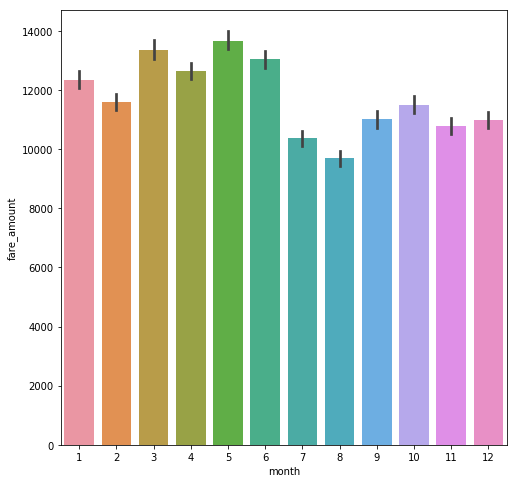

In [63]:
plt.figure(figsize= (8, 8))
ax_3 =  sns.barplot(x="month", y="fare_amount", data=train, estimator=sum)

In [0]:
# In the above bar graph, we clearly see that in 7th and 8th months, fare_ is less. In last 4 months fare_amount is moderate and starting 6 months fare_amount is high.

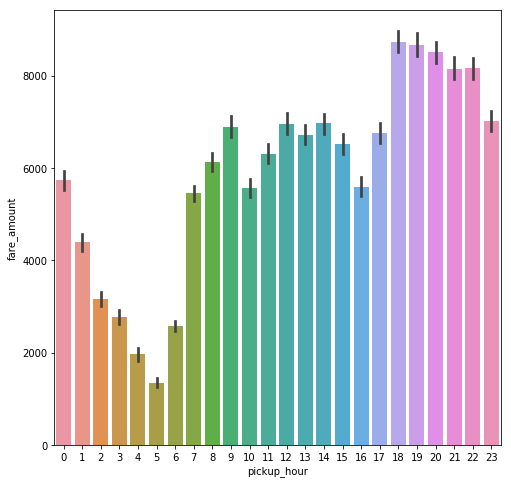

In [65]:
plt.figure(figsize= (8,8))
ax_4 =  sns.barplot(x="pickup_hour", y="fare_amount", data=train, estimator=sum)

In [0]:
# In the above bar graph, we clearly see that fare_amount is less between 12:00 am to 6:00 am. Fare_amount is moderate between 7:00am to 5:00 pm and fare_amount is high between 6:00pm to 11:00 pm

train['pickup_session'] = pd.cut(x=train['pickup_hour'], bins=[-1,6,17,24],labels=["1","2","3"])
                      
# pickup_hour was converted into hour_session. From 12-6 am, fare_amount is less so it was converted into category "1"
# From 7 am to 5 pm , fare_amount is moderate so it was converted into category "2"
# From 6 pm to 12:00 am, fare_amount is high so it was converted into category "3

In [0]:
train["pickup_session"] = train["pickup_session"].astype(int)
del train["pickup_hour"]

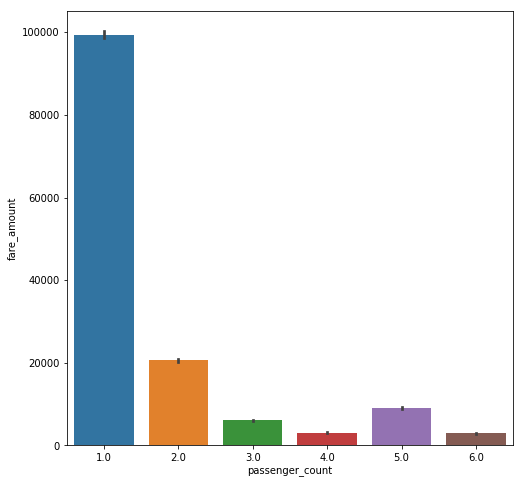

In [68]:
plt.figure(figsize= (8,8))
ax_5 =  sns.barplot(x="passenger_count", y="fare_amount", data=train, estimator=sum)
# As it is already divided in the categories so no need to convert.

In [69]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,pickup_days,pickup_session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,2,2
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,2,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,2,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,2,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,2,2


**Converting all the latitude and longitude values to datatype float.**

In [0]:
train["pickup_longitude"] = train["pickup_longitude"].astype(float)
train["pickup_latitude"] = train["pickup_latitude"].astype(float)
train["dropoff_longitude"] = train["dropoff_longitude"].astype(float)
train["dropoff_latitude 	"] = train["dropoff_latitude"].astype(float)


# Using Haversine Method to calculate distance using co-ordinates (Latitude and Longitude)


In [0]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    
    #Calculate the great circle distance between two points 
    #on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [0]:
train.reset_index(drop=True, inplace=True)
train['dist_travelled_in_km'] = train.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)
train.reset_index(drop=True, inplace=True)

In [73]:
train["dist_travelled_in_km"].describe()

count    15981.000000
mean        15.011891
std        310.962107
min          0.000000
25%          1.214832
50%          2.125945
75%          3.859133
max       8667.542104
Name: dist_travelled_in_km, dtype: float64

In [0]:
train = train.drop(train[train['dist_travelled_in_km']<= 0.025].index, axis=0) # drop the variable which have dist_travelled_in_km <= 0.025

In [75]:
train.isnull().sum()

fare_amount             0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
month                   0
pickup_days             0
pickup_session          0
dropoff_latitude \t     0
dist_travelled_in_km    0
dtype: int64

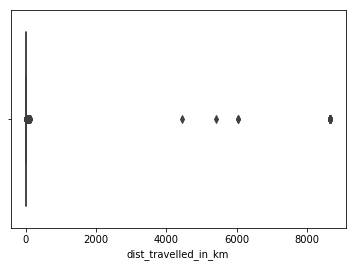

In [76]:
train["passenger_count"] = train["passenger_count"].astype(int)
sns.boxplot(x=train['dist_travelled_in_km'],data=train,orient='h')

**Removing Distance Outliers**

In [0]:
q1 =  train['dist_travelled_in_km'].quantile(0.25)
q3 = train['dist_travelled_in_km'].quantile(0.75)
IQR_dist = q3 - q1

In [78]:
(train[(train['dist_travelled_in_km'] < Q1-1.5*IQR ) | (train['dist_travelled_in_km'] > Q3+1.5*IQR)]['dist_travelled_in_km']).shape

(64,)

In [0]:
maximum_dist = q3+1.5*IQR_dist
minimum_dist = q1-1.5*IQR_dist

In [80]:
maximum_dist, minimum_dist

(7.976026760863731, -2.7232802834688297)

In [0]:
train = train.drop(train[train.loc[:,"dist_travelled_in_km"]< minimum_dist].index)


train = train.drop(train[train.loc[:,"dist_travelled_in_km"]> maximum_dist].index)

In [82]:
train["fare_amount"].describe()


count    14119.000000
mean         8.784186
std          3.922506
min          0.010000
25%          5.700000
50%          8.000000
75%         10.900000
max         22.100000
Name: fare_amount, dtype: float64

In [83]:
train.isnull().sum()

fare_amount             0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
month                   0
pickup_days             0
pickup_session          0
dropoff_latitude \t     0
dist_travelled_in_km    0
dtype: int64

In [84]:
train["dist_travelled_in_km"].describe()

count    14119.000000
mean         2.481007
std          1.668775
min          0.028489
25%          1.224414
50%          2.006737
75%          3.307953
max          7.974208
Name: dist_travelled_in_km, dtype: float64

In [85]:
train.shape

(14119, 12)

In [86]:
train.isnull().sum()

fare_amount             0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
month                   0
pickup_days             0
pickup_session          0
dropoff_latitude \t     0
dist_travelled_in_km    0
dtype: int64

In [0]:
train.reset_index(drop=True, inplace=True)

In [88]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,pickup_days,pickup_session,dropoff_latitude,dist_travelled_in_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,2,2,40.712278,1.030764
1,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,2,1,40.750562,1.389525
2,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,2,1,40.758092,2.799270
3,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,2,2,40.783762,1.999157
4,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,2,2,40.758233,3.787239


In [0]:
train = train.filter(["fare_amount" ,"pickup_longitude", 	"pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count", "year" ,"pickup_days","month" ,"pickup_session","dist_travelled_in_km"], axis = 1)

In [90]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,pickup_days,month,pickup_session,dist_travelled_in_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,2,1.030764
1,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,2,8,1,1.389525
2,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,1,2.799270
3,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,2,3,2,1.999157
4,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,2,1,2,3.787239


# Feature Selection 

**Checking VIF for Multicolinerity**


In [0]:
## Converting categorical values to int
train["passenger_count"] = train["passenger_count"].astype(int)
train["year"] = train["year"].astype(int)
train["month"] = train["month"].astype(int)
train["pickup_days"] = train["pickup_days"].astype(int)
train["pickup_session"] = train["pickup_session"].astype(int)

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_df = add_constant(train.iloc[:,1:11])
pd.Series([variance_inflation_factor(VIF_df.values, i) 
               for i in range(VIF_df.shape[1])], 
              index=VIF_df.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                   1.190010e+06
pickup_longitude        2.257470e+04
pickup_latitude         1.758946e+04
dropoff_longitude       2.255091e+04
dropoff_latitude        1.759864e+04
passenger_count         1.000590e+00
year                    1.014183e+00
pickup_days             1.001064e+00
month                   1.014201e+00
pickup_session          1.002957e+00
dist_travelled_in_km    1.022340e+00
dtype: float64

**Correlation Analysis**

In [0]:
cat_var = ("passenger_count", "year", "pickup_days", "month", "pickup_session")
cnames = ["fare_amount","pickup_longitude","pickup_latitude","dist_travelled_in_km", "dropoff_longitude", "dropoff_latitude"]
df_corr = train.loc[:,cnames]

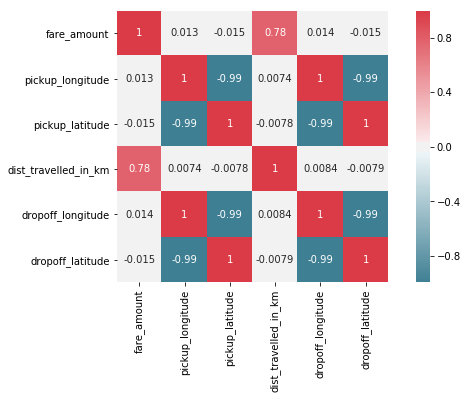

In [94]:
f , ax = plt.subplots(figsize = (10, 5))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [0]:
# As we can clearly see that pickup_latitude and pickup_longitude are highly negatively correlated.
# Pickup_latitude is highly positively correlated dropoff_latitude
# Dropoff_longitude is highly correlated with pickup_longitude.

## So we remove three variables from these four i.e. pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude.
## And we should preserve only one from them.
# So, we are preserving dropoff_longitude. Because of its higher correlation value with fare_amount and distance

del train['dropoff_longitude']
del train['dropoff_latitude']
#del train['pickup_longitude']
#del train['pickup_latitude']

# ANOVA Test for checking dependency.

In [96]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

for i in cat_var:
    mod = ols('fare_amount' + '~' + i, data = train).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)
    

                        sum_sq       df         F    PR(>F)
passenger_count      68.028414      1.0  4.422507  0.035486
Residual         217152.223402  14117.0       NaN       NaN
                 sum_sq       df           F        PR(>F)
year        5601.154138      1.0  373.650081  3.454038e-82
Residual  211619.097679  14117.0         NaN           NaN
                    sum_sq       df         F    PR(>F)
pickup_days      35.756122      1.0  2.324149  0.127402
Residual     217184.495695  14117.0       NaN       NaN
                 sum_sq       df        F    PR(>F)
month        143.211344      1.0  9.31335  0.002279
Residual  217077.040473  14117.0      NaN       NaN
                       sum_sq       df       F    PR(>F)
pickup_session       0.350823      1.0  0.0228  0.879981
Residual        217219.900993  14117.0     NaN       NaN


In [0]:
# del train['passenger_count']
del train['pickup_session']
del train["pickup_days"]

(array([ 75., 135., 291., 533., 709., 846., 877., 876., 828., 696., 716.,
        645., 591., 521., 533., 455., 417., 380., 335., 298., 284., 288.,
        220., 211., 186., 198., 184., 152., 156., 142., 148., 103., 110.,
        106.,  88., 108.,  86.,  82.,  83.,  76.,  72.,  46.,  47.,  55.,
         48.,  46.,  37.]),
 array([0.02848932, 0.19754717, 0.36660502, 0.53566287, 0.70472071,
        0.87377856, 1.04283641, 1.21189426, 1.3809521 , 1.55000995,
        1.7190678 , 1.88812564, 2.05718349, 2.22624134, 2.39529919,
        2.56435703, 2.73341488, 2.90247273, 3.07153058, 3.24058842,
        3.40964627, 3.57870412, 3.74776196, 3.91681981, 4.08587766,
        4.25493551, 4.42399335, 4.5930512 , 4.76210905, 4.9311669 ,
        5.10022474, 5.26928259, 5.43834044, 5.60739829, 5.77645613,
        5.94551398, 6.11457183, 6.28362967, 6.45268752, 6.62174537,
        6.79080322, 6.95986106, 7.12891891, 7.29797676, 7.46703461,
        7.63609245, 7.8051503 , 7.97420815]),
 <a list of 47 Pat

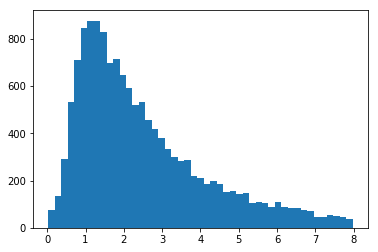

In [98]:
plt.hist(train["dist_travelled_in_km"], bins = "auto") # As it is left skewed, we'll normalise all numeric variable in same range

In [99]:
#Normalisation
c_names = ["dist_travelled_in_km", "pickup_longitude", "pickup_latitude"]
for i in c_names:
  print (i)
  train[i]= (train[i] - train[i].min())/(train[i].max() - train[i].min())

dist_travelled_in_km
pickup_longitude
pickup_latitude


In [100]:
train.head(3)

,fare_amount,pickup_longitude,pickup_latitude,passenger_count,year,month,dist_travelled_in_km
0,4.5,0.003346,0.997267,1,2009,6,0.126140
1,5.7,0.002143,0.997615,2,2011,8,0.171292
2,7.7,0.002105,0.997370,1,2012,4,0.348714


# Building Prediction Model and Verifying it.

In [101]:
from sklearn.model_selection import train_test_split
X = train.drop('fare_amount',axis=1).values
y = train['fare_amount'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
print(train.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)


(14119, 7) (11295, 6) (2824, 6) (11295,) (2824,)


In [102]:
# Building LinearRegression Model on training Data
lm = LinearRegression()
lm.fit(X_train,y_train)
#lets print the intercept 
print("LM Intercept : ", lm.intercept_)
predictions_LR =lm.predict(X_test)
RMSE_LR = np.sqrt(metrics.mean_squared_error(y_test,predictions_LR))
r2_LR = metrics.r2_score(y_test,predictions_LR)
MAE_LR = metrics.mean_absolute_error(y_test,predictions_LR)
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape
MAPE_LR = MAPE(y_test,predictions_LR)
LR_Results = {'RMSE_LR':RMSE_LR,'r2_LR':r2_LR,'MAE_LR':MAE_LR,'MAPE_LR':MAPE_LR}
print(LR_Results)

LM Intercept :  -625.2257285807453
{'RMSE_LR': 2.429564818610812, 'r2_LR': 0.6215387011802352, 'MAE_LR': 1.6550367012742122, 'MAPE_LR': 0.20342380649270767}


In [103]:
# Building Decision Tree Model on training Data
fit_DT  = DecisionTreeRegressor(max_depth = 4).fit(X_train, y_train)
# Apply model on splitted test data
predictions_DT = fit_DT.predict(X_test)
MAE_DT = metrics.mean_absolute_error(y_test,predictions_DT)
RMSE_DT = np.sqrt(metrics.mean_squared_error(y_test,predictions_DT))
r2_DT = metrics.r2_score(y_test,predictions_DT)
MAE_DT = metrics.mean_absolute_error(y_test,predictions_DT)
MAPE_DT = MAPE(y_test,predictions_DT)
DT_Results = {'RMSE_DT':RMSE_DT,'r2_DT':r2_DT,'MAE_DT':MAE_DT,'MAPE_DT':MAPE_DT}
print(DT_Results)

{'RMSE_DT': 2.374107631730988, 'r2_DT': 0.6386190099472366, 'MAE_DT': 1.6578903583779832, 'MAPE_DT': 0.19872330720068793}


In [104]:
# Building Random Forest Model on training data
RFModel = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)
# Apply model on splitting test data
predictions_RF = RFModel.predict(X_test)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test,predictions_RF))
r2_RF = metrics.r2_score(y_test,predictions_RF)
MAE_RF = metrics.mean_absolute_error(y_test,predictions_RF)
MAPE_RF = MAPE(y_test,predictions_RF) 
RF_Results = {'RMSE_RF':RMSE_RF,'r2_RF':r2_RF,'MAE_RF':MAE_RF,'MAPE_RF':MAPE_RF}
print(RF_Results)

{'RMSE_RF': 2.3728542040577607, 'r2_RF': 0.6390004967462052, 'MAE_RF': 1.6493791076487252, 'MAPE_RF': 0.19741851158803977}


In [105]:
## Error Metrics for All the above 3 models
Error_Metrics = {'RMSE':[RMSE_LR,RMSE_DT,RMSE_RF],
                  'r2':[r2_LR,r2_DT,r2_RF],
                     'MAE':[MAE_LR,MAE_DT,MAE_RF],
                   'MAPE':[MAPE_LR,MAPE_DT,MAPE_RF]}
                 

metrics_result =pd.DataFrame(Error_Metrics,index = ['Linear Regression', 'Decision Tree', 'Random Forest']) 

print(metrics_result)

                       RMSE        r2       MAE      MAPE
Linear Regression  2.429565  0.621539  1.655037  0.203424
Decision Tree      2.374108  0.638619  1.657890  0.198723
Random Forest      2.372854  0.639000  1.649379  0.197419


In [0]:
#***********************************************************************************************************************************************

# Manipulating Test Data

In [107]:
# Now, we will manipulate test data
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [108]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [0]:
#Making copy of test file.
df_test = test.copy()

In [0]:
df_test["pickup_datetime"] = pd.to_datetime(df_test['pickup_datetime'], errors='coerce')


In [111]:
df_test["passenger_count"].unique()

array([1, 2, 3, 4, 5, 6])

In [0]:
# Now we'll split the pickup_date time variable into year, month, date.

df_test['year'] =df_test['pickup_datetime'].dt.year
df_test['month'] = df_test['pickup_datetime'].dt.month
df_test['pickup_date'] = df_test['pickup_datetime'].dt.day
df_test['pickup_hour'] = df_test['pickup_datetime'].dt.hour

In [0]:
#Manipulating as train data
df_test["pickup_date"] = pd.cut(x=df_test['pickup_date'], bins=[0,28,32],labels=[2,1])
                      
# pickup_date was converted into date_session. Date 29-31, was converted into category "1"
# Date 1-28 was converted into category "2"

In [0]:
# In the above bar graph, we clearly see that fare_amount is less between 12:00 am to 6:00 am. Fare_amount is moderate between 7:00am to 5:00 pm and fare_amount is high between 6:00pm to 11:00 pm

df_test['pickup_session'] = pd.cut(x=df_test['pickup_hour'], bins=[-1,6,17,24],labels=["1","2","3"])
                      
# pickup_hour was converted into hour_session. From 12-6 am, fare_amount is less so it was converted into category "1"
# From 7 am to 5 pm , fare_amount is moderate so it was converted into category "2"
# From 6 pm to 12:00 am, fare_amount is high so it was converted into category "3

In [0]:
df_test["pickup_longitude"] = df_test["pickup_longitude"].astype(float)
df_test["pickup_latitude"] = df_test["pickup_latitude"].astype(float)
df_test["dropoff_longitude"] = df_test["dropoff_longitude"].astype(float)
df_test["dropoff_latitude"] = df_test["dropoff_latitude"].astype(float)


In [0]:
df_test['dist_travelled_in_km'] = df_test.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)

In [117]:
df_test.shape

(9914, 12)

In [0]:
df_test = df_test.filter(["pickup_longitude", 	"pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count", "year" ,"month" ,"pickup_days", "picku_session","dist_travelled_in_km"], axis = 1)

In [119]:
(df_test==0).sum()

pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
passenger_count          0
year                     0
month                    0
dist_travelled_in_km    85
dtype: int64

In [0]:
df_test = df_test.filter(["pickup_longitude","pickup_latitude", "passenger_count",	"year", "month", "dist_travelled_in_km"])
#df_test = df_test.filter(["passenger_count",	"year", "month", "dist_travelled_in_km"])

In [121]:
df_test.head()

,pickup_longitude,pickup_latitude,passenger_count,year,month,dist_travelled_in_km
0,-73.973320,40.763805,1,2015,1,2.323259
1,-73.986862,40.719383,1,2015,1,2.425353
2,-73.982524,40.751260,1,2011,10,0.618628
3,-73.981160,40.767807,1,2012,12,1.961033
4,-73.966046,40.789775,1,2012,12,5.387301


In [122]:
#Normalisation
c_names = ["dist_travelled_in_km", "pickup_longitude", "pickup_latitude"]
for i in c_names:
  print (i)
  df_test[i]= (df_test[i] - df_test[i].min())/(df_test[i].max() - df_test[i].min())

dist_travelled_in_km
pickup_longitude
pickup_latitude


# Predicting on Test Data

**Training the model on X, y (train.csv dataset full) and then predicting on df_test(copy of test.csv)**
**We are using Random forest algoritham because it has better results than other**

In [0]:
RFModel = RandomForestRegressor(n_estimators = 200).fit(X, y)
fare_amount_test = RFModel.predict(df_test)
df_test["fare_amount"] = fare_amount_test

In [124]:
df_test.head()

,pickup_longitude,pickup_latitude,passenger_count,year,month,dist_travelled_in_km,fare_amount
0,0.220338,0.167776,1,2015,1,0.023234,9.06440
1,0.209638,0.128686,1,2015,1,0.024254,9.16455
2,0.213066,0.156736,1,2011,10,0.006187,6.15450
3,0.214143,0.171297,1,2012,12,0.019611,8.35655
4,0.226085,0.190628,1,2012,12,0.053875,8.33600


In [125]:
df_test["fare_amount"].describe()

count    9914.000000
mean        7.919921
std         1.064688
min         4.786500
25%         7.361325
50%         7.919650
75%         8.577700
max        14.623000
Name: fare_amount, dtype: float64

**Concatenating the result with original test dataset**

In [0]:
test_predicted = pd.concat([test, df_test["fare_amount"]], axis=1)

In [127]:
test_predicted.shape

(9914, 7)

In [128]:
test_predicted["fare_amount"].describe()

count    9914.000000
mean        7.919921
std         1.064688
min         4.786500
25%         7.361325
50%         7.919650
75%         8.577700
max        14.623000
Name: fare_amount, dtype: float64

In [129]:
test_predicted.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,9.06440
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,9.16455
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,6.15450
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,8.35655
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,8.33600


In [0]:
#save output results 
test_predicted.to_csv("Cab_fare_predicted.csv", index = False)